# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [47]:
### импортируйте нужные библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('./data/diabetes_prediction_dataset-1.csv')

In [49]:
# ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [50]:
# ваш код здесь
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**Вывод:**
<p>Средний возраст составляет примерно 42 года(округлил), отклонение показывает широкий разброс возрастов = 22.5</p>
<p>По статистике гипертонии(0.075), болезни сердца(0.039), а также диабета(0.085), видно, что большинство людей не имеют этих заболеваний</p>
<p>Из колонки bmi мы видем крайние показатели указывающие на недостаточный вес и ожирение. По среднему показателю можно сделать вывод, что люди имеют избыточный вес. отклонение(6.64) показывает умеренный разброс значений, что говорит о том, что большинство людей имеют примерно одинаковый вес</p>
<p>Уровень гемоглобина в среднем 5.5 с небольшим отклонением 1.07 из чего можно сделать вывод, что у большинства людей нормальный уровень гемоглобина</p>
<p>Уровень глюкозы в крови указывает на наличие как нормальных, так и сильно повышенных значений. А Стандартное отклонение(40.7) показывает значительный разброс значений</p>

## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [51]:
# ваш код здесь
print("кол-во дубликатов:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

кол-во дубликатов: 3854


### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [52]:
# ваш код здесь
df.isna().sum()
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [53]:
# ваш код здесь

**Вывод:**
<p>В ходе предобработки были удалены дубликаты и была произведена проверка пустых значений, которые не были обнаружены.</p>
<p>Все данные соответствуют своим типам, по этому замена не потребовалась.</p>

## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

In [54]:
# Разделение признаков на числовые и категориальные
numeric = df.select_dtypes(include=['float64', 'int64']).columns.tolist()  # Выбираем числовые столбцы
categorical = df.select_dtypes(include=['object']).columns.tolist()  # Выбираем категориальные столбцы
print("Числовые признаки:", numeric)
print("Категориальные признаки:", categorical)

Числовые признаки: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
Категориальные признаки: ['gender', 'smoking_history']


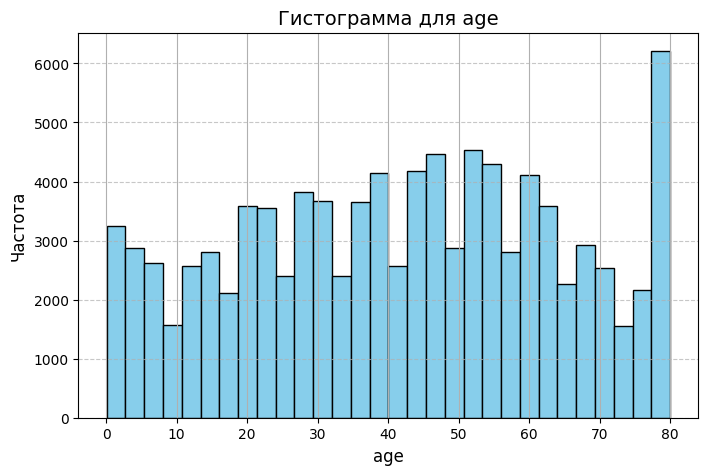

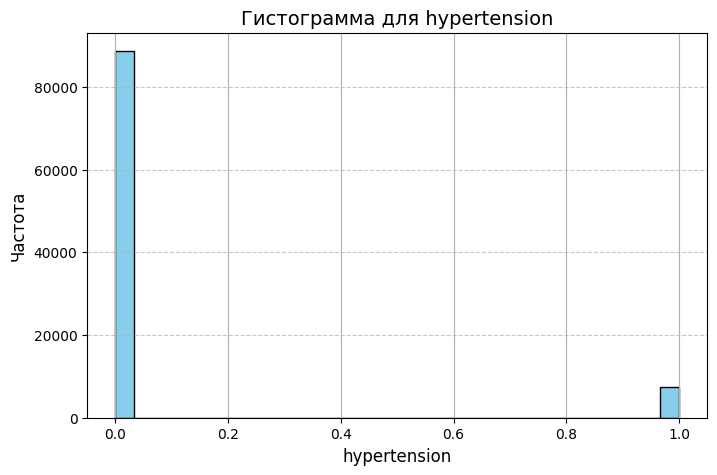

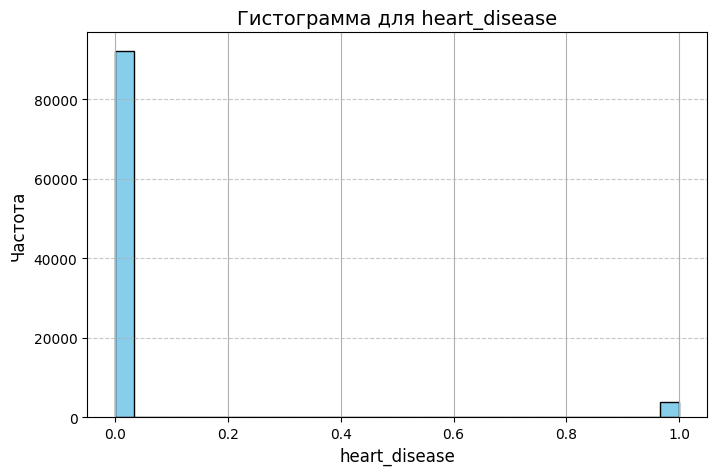

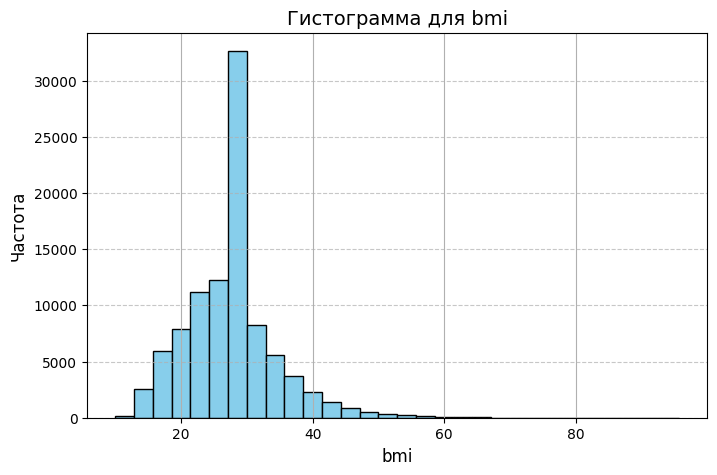

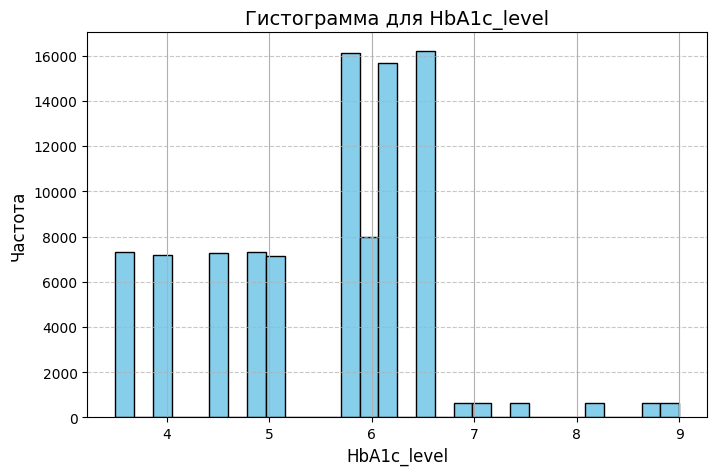

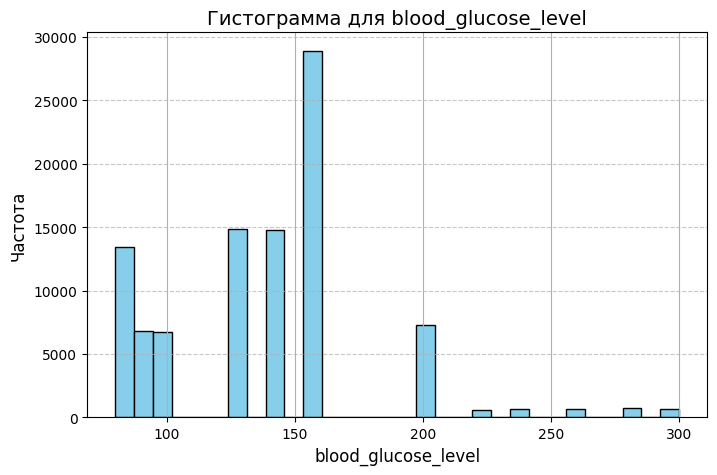

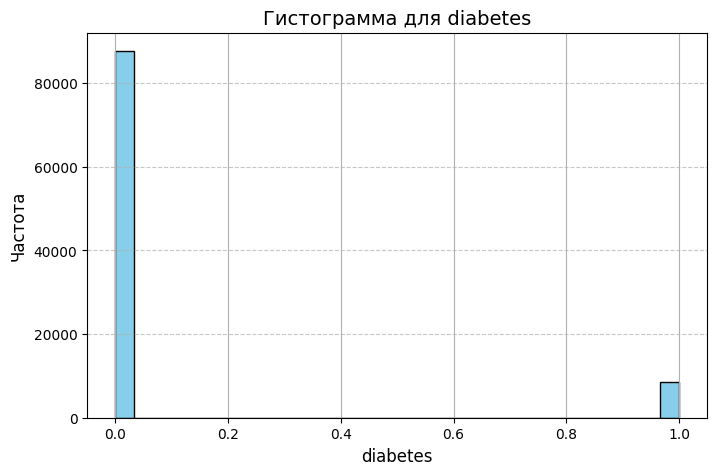

In [55]:
# Построение гистограмм для всех числовых столбцов
for col in numeric:
    plt.figure(figsize=(8, 5))
    df[col].hist(bins=30, edgecolor="black", color="skyblue")
    plt.title(f"Гистограмма для {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Частота", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

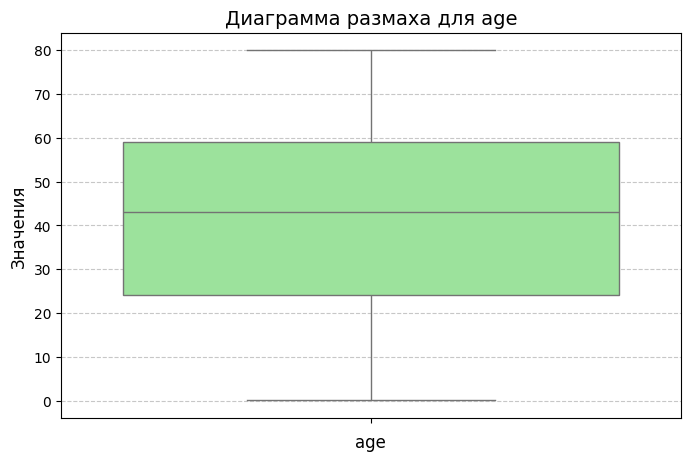

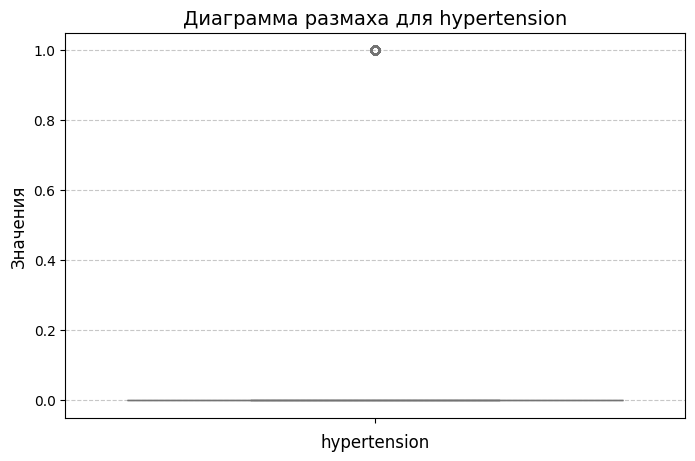

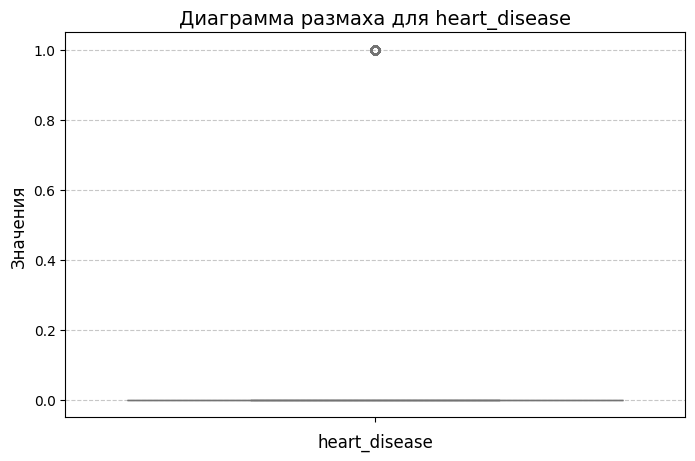

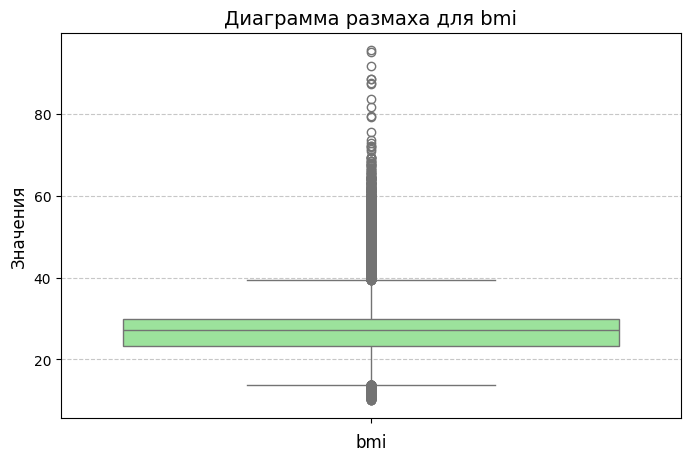

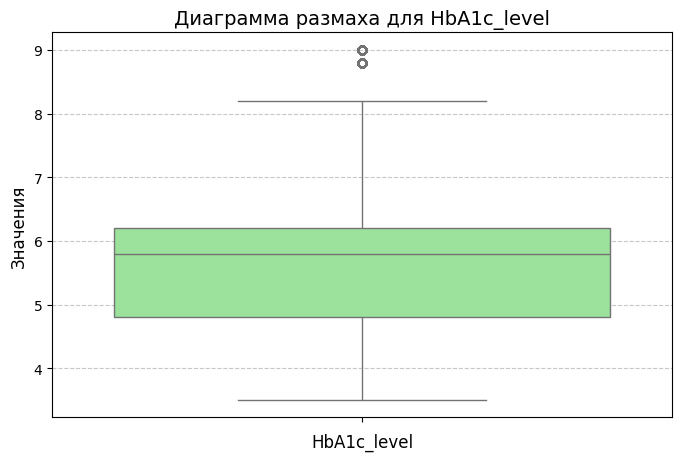

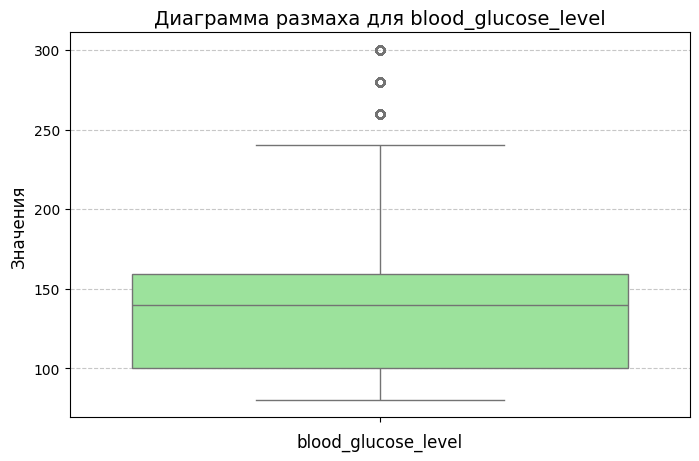

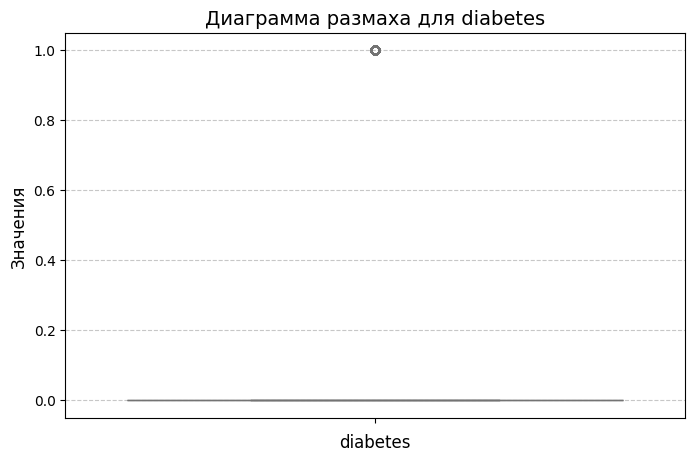

In [56]:
# Построение диаграмм размаха (ящики с усами)
for col in numeric:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df[col], color="lightgreen")
    plt.title(f"Диаграмма размаха для {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Значения", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

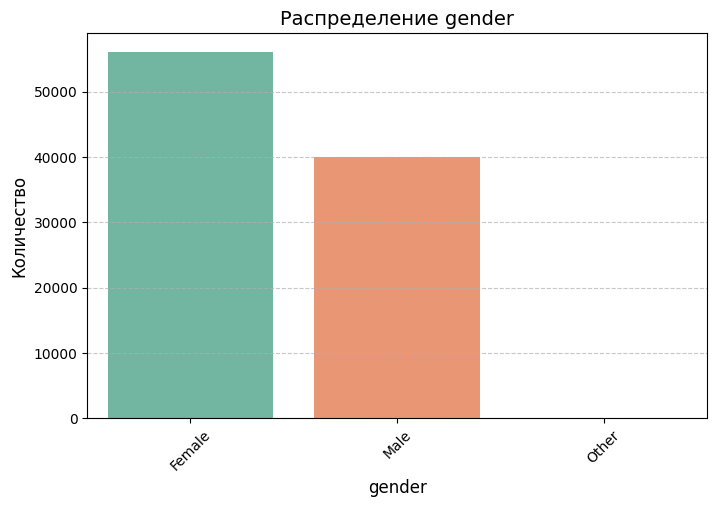

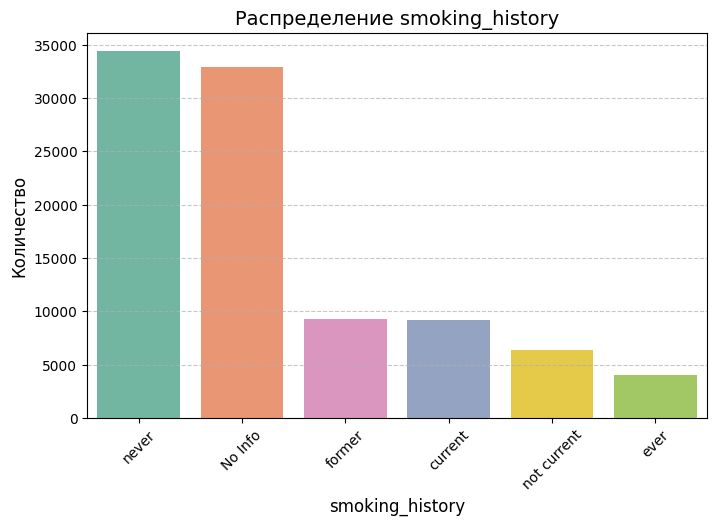

In [57]:
# Анализ категориальных переменных
for col in categorical:
    plt.figure(figsize=(8, 5))
    
    sns.countplot(x=col, data=df, palette="Set2", order=df[col].value_counts().index, hue=col, legend=False)
    plt.title(f"Распределение {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Количество", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

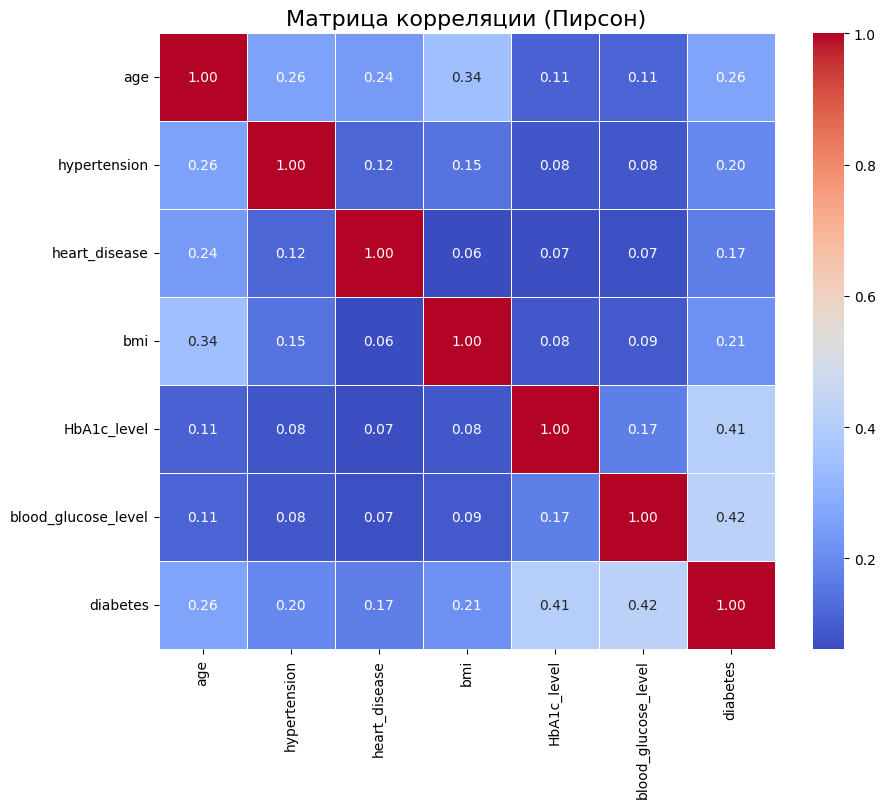

In [58]:
# Построение матрицы корреляции для числовых переменных
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Матрица корреляции (Пирсон)", fontsize=16)
plt.show()

**Вывод:**
<p>На гистограмме возрастов виден основной пик около 40–45 лет, что указывает на то, что большинство пациентов находятся в средней возрастной группе. Гистограмма ИМТ показывает два заметных пика, в диапазоне 25–30 (нормальный/немного избыточный вес), а второй — выше 30 (ожирение). Это говорит о том, что значительная часть пациентов имеет проблемы с весом. Диаграмма уровня HbA1c делится на две части: уровень ниже 5.5-6(у большинства) и уровень выше 7(у меньшинства). Уровень глюкозы в крови схож с HbA1c: здесь также выделяются две группы — до 140(пик 135–140) и выше 200.</p>
<p>Для возраста виден широкий разброс значений от 20 до 80 лет, с медианой около 43 лет. Небольшое количество выбросов наблюдается в верхней части диапазона 80 лет. В случае с ИМТ заметно много выбросов в верхней части более 35, что указывает на наличие людей с ожирением. Основная масса данных сосредоточена в диапазоне 20–35. Уровень HbA1c также демонстрирует несколько выбросов выше 8, что может быть связано с пациентами, имеющими диабет или преддиабет. Для уровня глюкозы в крови наблюдаются выбросы выше 250.</p>
<p>Большинство пациентов — женщины. По истории курения значительная часть людей никогда не курила или данные отсутствуют, однако также присутствует группа бывших курильщиков и текущих курильщиков. Распределение хронических заболеваний (гипертония, болезни сердца, диабет) показывает, что эти состояния встречаются относительно редко (4–10% выборки).</p>
<p>Матрица корреляции демонстрирует сильную связь между уровнем глюкозы и наличием диабета, что логично, т.к. высокий уровень глюкозы в крови является основным признаком диабета. Также заметна корреляция между уровнем HbA1c и диабетом, что подтверждает важность этого показателя для диагностики.</p>

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

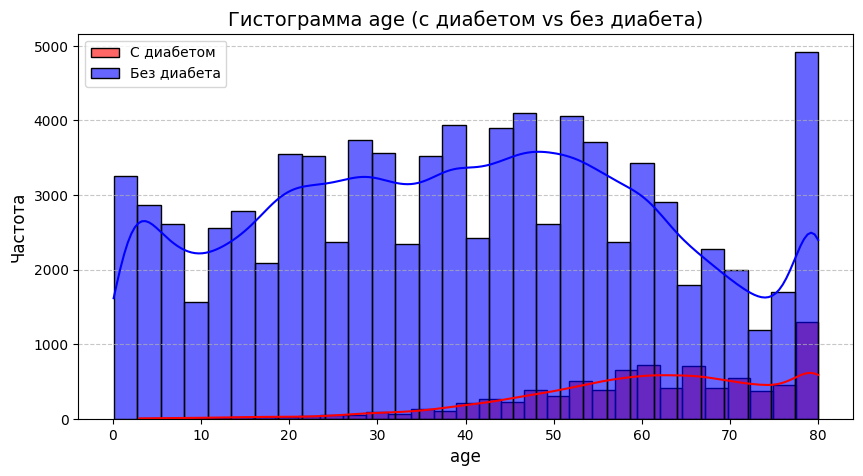

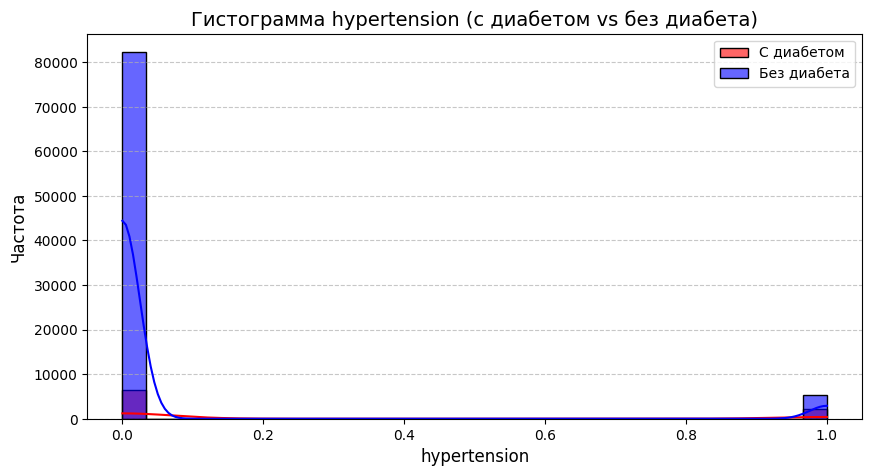

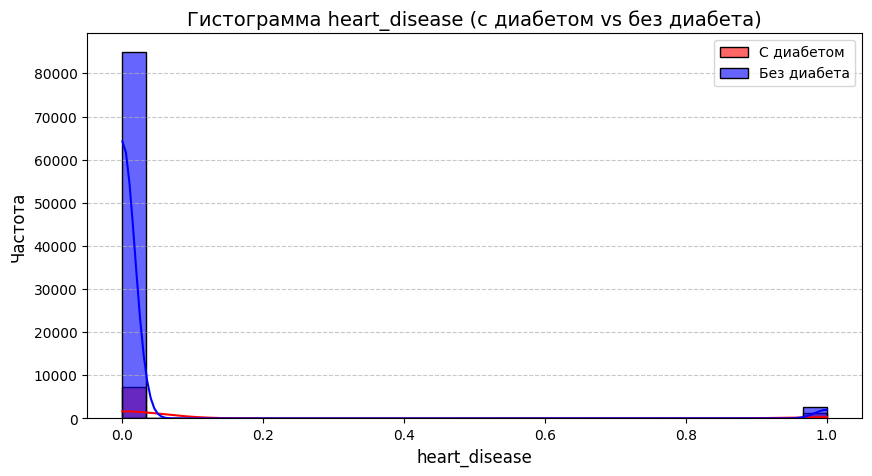

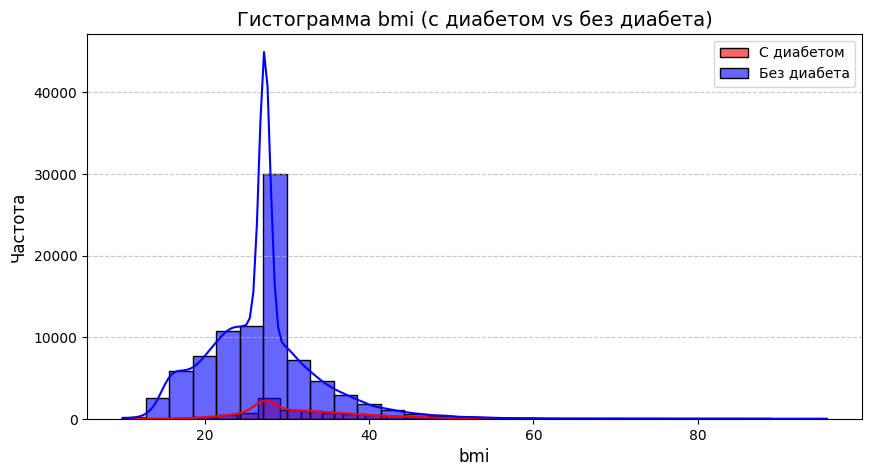

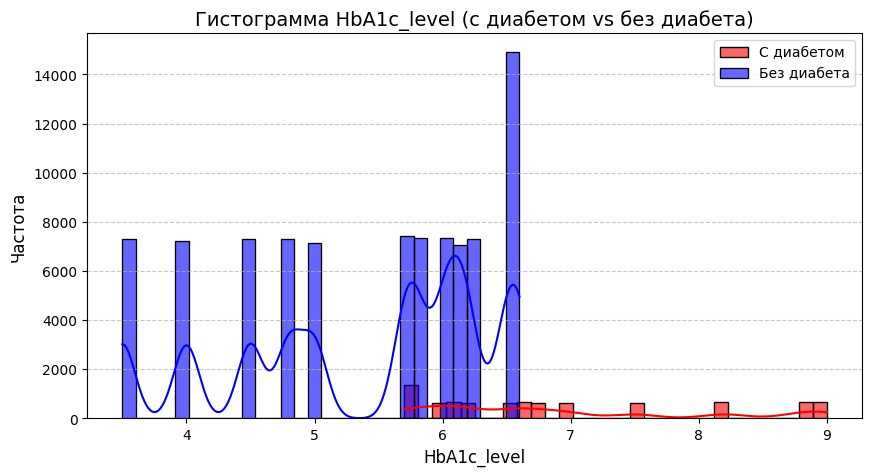

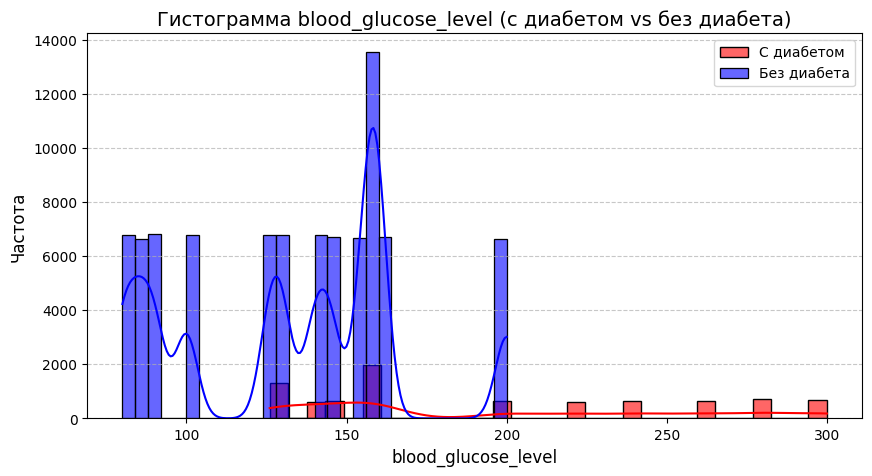

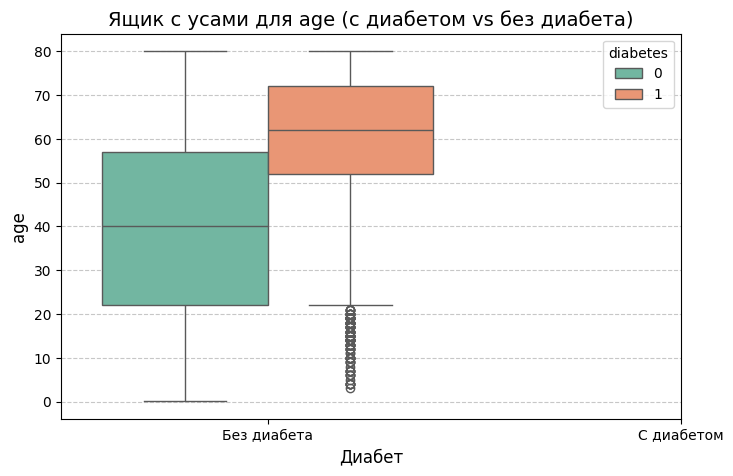

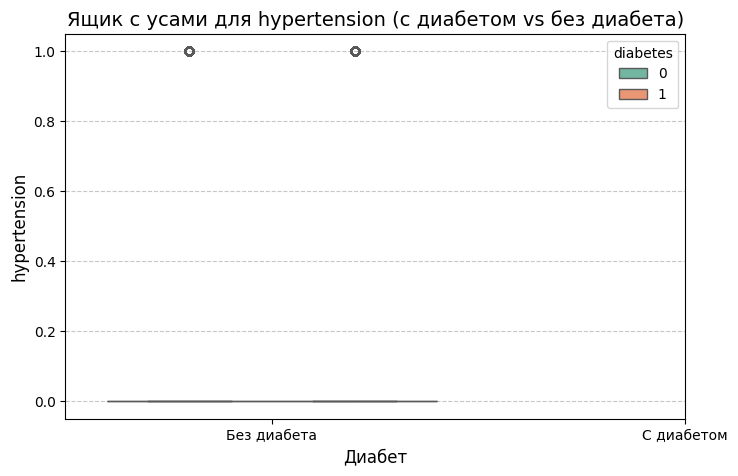

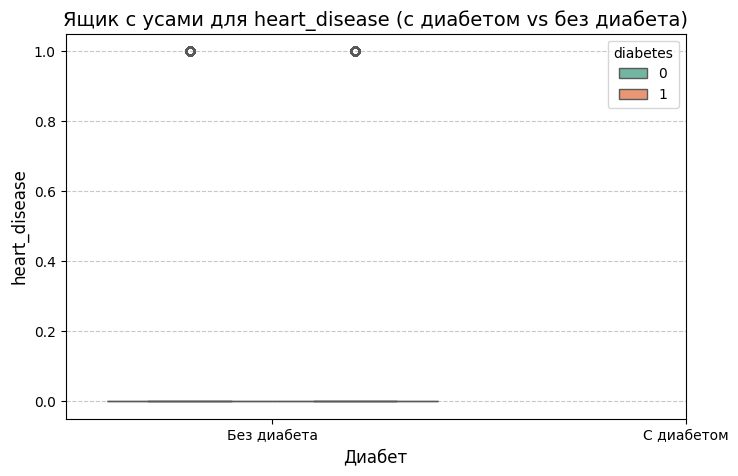

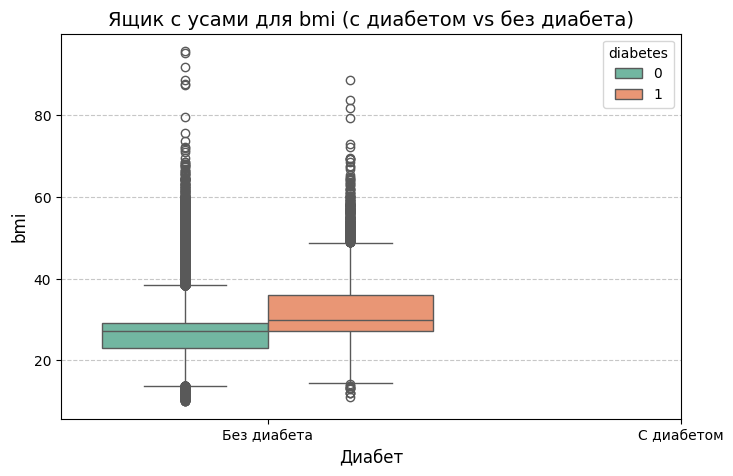

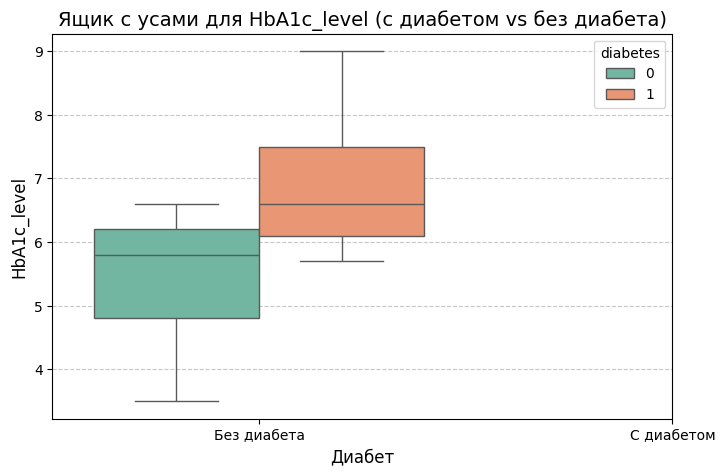

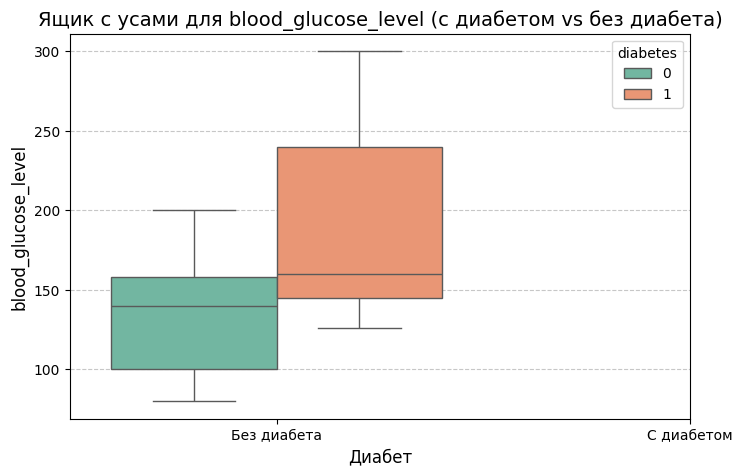

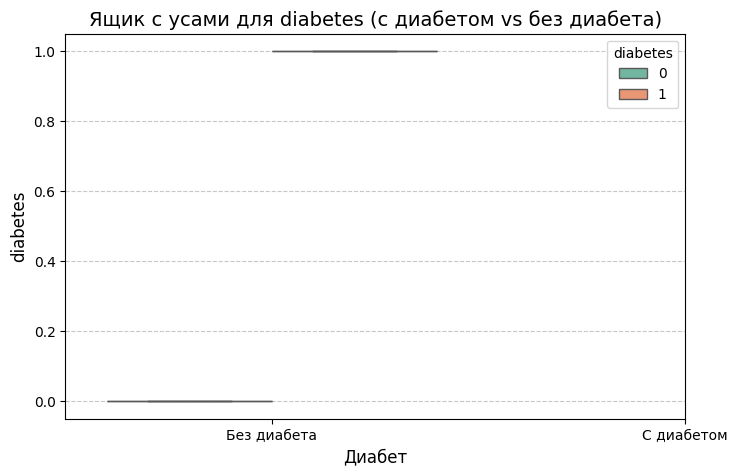

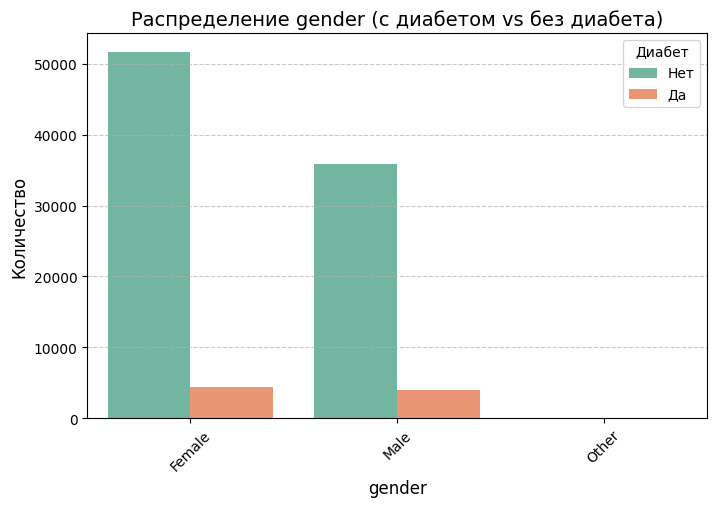

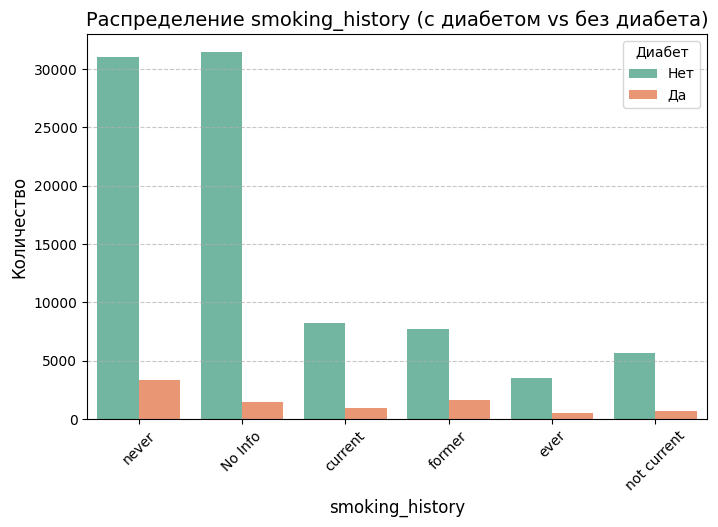

In [59]:
# ваш код здесь
diabetes = df[df['diabetes'] == 1]  # Люди с диабетом
no_diabetes = df[df['diabetes'] == 0]  # Люди без диабета
# 1. Сравнение числовых признаков Гистограммы
for col in numeric:
    if col != 'diabetes':  # Исключаем целевой признак
        plt.figure(figsize=(10, 5))
        sns.histplot(diabetes[col], bins=30, kde=True, label='С диабетом', color='red', alpha=0.6)
        sns.histplot(no_diabetes[col], bins=30, kde=True, label='Без диабета', color='blue', alpha=0.6)
        plt.title(f'Гистограмма {col} (с диабетом vs без диабета)', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Частота', fontsize=12)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
# 1. Сравнение числовых признаков Ящики с усами 
for col in numeric:
    plt.figure(figsize=(8, 5))
    sns.boxplot(hue='diabetes', y=col, data=df, palette='Set2')
    plt.title(f'Ящик с усами для {col} (с диабетом vs без диабета)', fontsize=14)
    plt.xlabel('Диабет', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['Без диабета', 'С диабетом'], fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
# 2. Сравнение категориальных признаков (столбчатые диаграммы)
for col in categorical:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='diabetes', data=df, palette='Set2')
    plt.title(f'Распределение {col} (с диабетом vs без диабета)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.legend(title='Диабет', labels=['Нет', 'Да'])
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

**Вывод:**
<p>Возраст, ИМТ, уровень HbA1c и уровень глюкозы в крови тесно связаны с наличием диабета т.к. люди с диабетом старше, имеют более высокий ИМТ, повышенный уровень HbA1c (более 6.5) и глюкозы (более 140).</p>
<p>Пол не является значимым фактором для развития диабета, а данных по истории курения недостаточно для связи с повышенным риском диабета.</p>

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах: </br>
Данные исследования показывают, что диабет тесно связан с возрастом, ИМТ, уровнем HbA1c и уровнем глюкозы в крови. Эти факторы являются ключевыми для прогнозирования и профилактики заболевания. Пол не оказывает значимого влияния на риск диабета, тогда как история курения может быть связана с повышенным риском, но требует дополнительного изучения. Это исследование может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.